# ROMY Barometer - Statistic Plots

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from obspy import read_inventory

from andbro__read_sds import __read_sds

In [2]:
from functions.get_mean_promy_pressure import __get_mean_promy_pressure
from functions.get_mean_rmy_pressure import __get_mean_rmy_pressure

In [3]:
#%matplotlib tk

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [5]:
config = {}

# output path for figures
config['path_to_figs'] = data_path+"romy_baro/figures/"

# path to data archive
config['path_to_data'] = data_path+"romy_baro/data/"



## Load Data

In [6]:
df = pd.read_pickle(config['path_to_data']+"RB_statistics.pkl")

In [7]:
df = df[df.status == False]

In [8]:
df.keys()

Index(['t1', 't2', 'status', 'shift_PP_N', 'shift_PP_E', 'shift_HP_N',
       'shift_HP_E', 'cmax_PP_N', 'cmax_PP_E', 'cmax_HP_N', 'cmax_HP_E', 'r_z',
       'r_n', 'r_e', 'a_z', 'a_n', 'a_e', 'b_z', 'b_n', 'b_e'],
      dtype='object')

In [9]:
for k in ["shift_PP_N", "shift_PP_E", "shift_HP_N", "shift_HP_E"]:
    df[k] = df[k]/20 # 20 Hz sampling rate


In [10]:
df = df[df.b_e != 0]

In [11]:
df

,t1,t2,status,shift_PP_N,shift_PP_E,shift_HP_N,shift_HP_E,cmax_PP_N,cmax_PP_E,cmax_HP_N,cmax_HP_E,r_z,r_n,r_e,a_z,a_n,a_e,b_z,b_n,b_e
5,2024-03-20T10:00:00.000000Z,2024-03-20T13:00:00.000000Z,False,305.35,305.70,316.50,316.85,-0.471640,0.460547,-0.397999,0.426105,0.80,2.36,0.02,-9.714662e-10,3.796052e-10,-4.951925e-11,-4.741183e-10,-4.739725e-10,8.176728e-11
6,2024-03-20T12:00:00.000000Z,2024-03-20T15:00:00.000000Z,False,-8.50,-9.85,3.90,3.40,0.476393,-0.644855,0.524291,-0.719407,3.80,30.28,51.43,1.989710e-10,4.215410e-10,-5.672522e-10,1.288190e-10,3.111073e-10,-7.558687e-10
7,2024-03-20T14:00:00.000000Z,2024-03-20T17:00:00.000000Z,False,200.60,200.80,-13.50,216.70,0.485370,-0.531440,-0.489481,-0.521891,17.24,23.75,21.00,4.422061e-09,1.976369e-09,-3.117407e-09,-8.273446e-11,-8.277420e-10,6.644031e-10
8,2024-03-20T16:00:00.000000Z,2024-03-20T19:00:00.000000Z,False,13.30,231.95,-1.85,250.20,0.649767,-0.526019,-0.752598,-0.478492,9.52,56.98,20.16,2.092206e-09,8.326584e-10,-1.566697e-09,1.285933e-09,-4.135359e-09,1.821083e-09
9,2024-03-20T18:00:00.000000Z,2024-03-20T21:00:00.000000Z,False,-16.75,-19.15,-0.25,-1.95,-0.656916,0.716376,-0.732197,0.793415,1.96,53.59,62.41,1.627042e-10,4.769966e-11,-3.151839e-10,8.782032e-12,-3.492102e-09,2.020329e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2024-04-27T12:00:00.000000Z,2024-04-27T15:00:00.000000Z,False,7.85,5.75,-1.75,-3.00,0.606390,-0.563430,-0.791513,0.745487,0.43,63.55,54.93,-2.356523e-11,8.453886e-10,-7.556479e-10,-8.201068e-11,-2.349792e-09,9.896109e-10
463,2024-04-27T14:00:00.000000Z,2024-04-27T17:00:00.000000Z,False,10.20,67.05,-2.00,51.65,0.548573,-0.509622,-0.595393,0.461949,1.02,37.65,15.03,-2.119934e-10,4.631004e-10,-4.010174e-10,1.656408e-10,-1.075367e-09,3.440425e-10
464,2024-04-27T16:00:00.000000Z,2024-04-27T19:00:00.000000Z,False,13.95,14.15,-1.80,-1.95,0.687473,-0.592102,-0.756589,0.702465,5.33,57.28,47.81,-1.167461e-10,3.265431e-10,-2.160983e-10,-7.105954e-11,-1.528021e-09,1.225320e-09
465,2024-04-27T18:00:00.000000Z,2024-04-27T21:00:00.000000Z,False,-15.70,-16.20,-0.95,-1.60,-0.731806,0.773990,-0.903259,0.916986,6.60,81.29,82.81,-1.315418e-10,2.885712e-10,-2.230102e-10,-3.927355e-11,-3.084005e-09,1.801738e-09


In [12]:
df2 = df[(df.r_z > 50) & (df.r_n > 50) & (df.r_e > 50)]

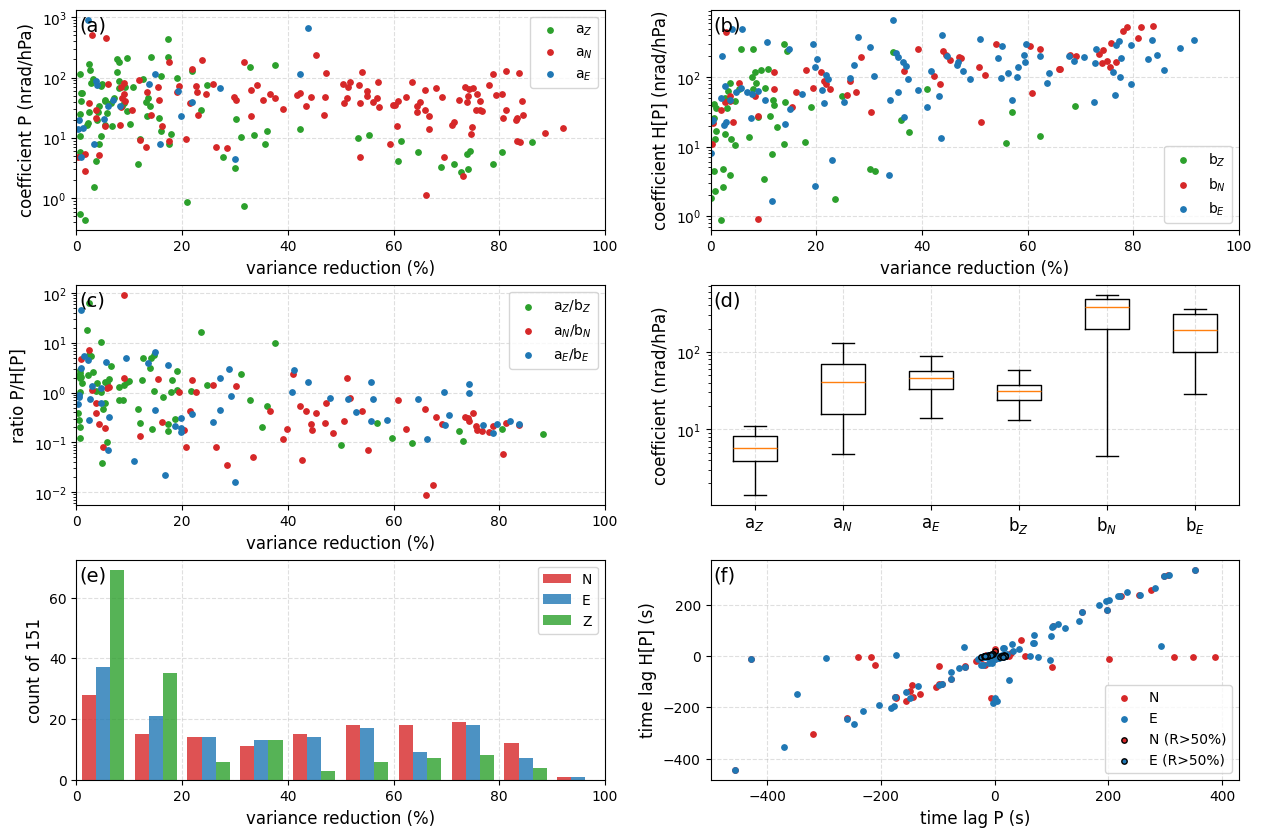

In [13]:
def __makeplot():

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    colors = {"Z":"tab:green", "N":"tab:red", "E":"tab:blue"}

    Nrow, Ncol = 3, 2

    font = 12

    scale, unit = 1e11, "nrad/hPa"

    hil = r"H[P]"

    fig = plt.figure(figsize=(15, 10))

    gs = GridSpec(Nrow, Ncol, figure=fig, hspace=0.25)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])

    # ___________________________________________________
    ax0.scatter(df.r_z, df.a_z*scale, s=15, color=colors["Z"], label=r"a$_Z$", zorder=2)
    ax0.scatter(df.r_n, df.a_n*scale, s=15, color=colors["N"], label=r"a$_N$", zorder=2)
    ax0.scatter(df.r_e, df.a_e*scale, s=15, color=colors["E"], label=r"a$_E$", zorder=2)
    ax0.legend(fontsize=font-2)
    ax0.set_yscale("log")
    ax0.set_xlim(0, 100)
    ax0.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax0.set_ylabel(f"coefficient P ({unit})", fontsize=font)

    # ___________________________________________________
    ax1.scatter(df.r_z, df.b_z*scale, s=15, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax1.scatter(df.r_n, df.b_n*scale, s=15, color=colors["N"], label=r"b$_N$", zorder=2)
    ax1.scatter(df.r_e, df.b_e*scale, s=15, color=colors["E"], label=r"b$_E$", zorder=2)
    ax1.legend(fontsize=font-2)
    ax1.set_yscale("log")
    ax1.set_xlim(0, 100)
    ax1.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax1.set_ylabel(f"coefficient {hil} ({unit})", fontsize=font)

    # ___________________________________________________
    ax2.scatter(df.r_z, (df.a_z*scale)/(df.b_z*scale), s=15, color=colors["Z"], label=r"a$_Z$/b$_Z$", zorder=2)
    ax2.scatter(df.r_n, (df.a_n*scale)/(df.b_n*scale), s=15, color=colors["N"], label=r"a$_N$/b$_N$", zorder=2)
    ax2.scatter(df.r_e, (df.a_e*scale)/(df.b_e*scale), s=15, color=colors["E"], label=r"a$_E$/b$_E$", zorder=2)
    ax2.legend(fontsize=font-2)
    # ax2.set_ylim(-2, 2)
    ax2.set_xlim(0, 100)
    ax2.set_yscale("log")
    ax2.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax2.set_ylabel(f"ratio P/{hil}", fontsize=font)

    # ___________________________________________________
    # ax3.boxplot([abs(df.a_z*scale), abs(df.a_n*scale), abs(df.a_e*scale), abs(df.b_z*scale), abs(df.b_n*scale), abs(df.b_e*scale)],)
    ax3.boxplot([abs(df2.a_z*scale), abs(df2.a_n*scale), abs(df2.a_e*scale), abs(df2.b_z*scale), abs(df2.b_n*scale), abs(df2.b_e*scale)],)
    ax3.set_yscale("log")
    ax3.set_xticklabels([r"a$_Z$", r"a$_N$", r"a$_E$", r"b$_Z$", r"b$_N$", r"b$_E$"], fontsize=font)
    ax3.set_ylabel(f"coefficient ({unit})", fontsize=font)

    # ___________________________________________________
    ax4.hist([df.r_n, df.r_e, df.r_z], bins=10, range=[0, 100], alpha=0.8,
             rwidth=0.8, align="mid", density=False, zorder=2,
             color=[colors["N"], colors["E"], colors["Z"]], label=["N","E","Z"],
            )
    ax4.grid(alpha=0.2, ls="--", zorder=0)
    ax4.set_xlim(0, 100)
    ax4.legend(fontsize=font-2)
    ax4.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax4.set_ylabel(f"count of {df.shape[0]}", fontsize=font)

    # ___________________________________________________
    # ax5.scatter(df.r_z, df.a_z, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax5.scatter(df.shift_PP_N, df.shift_HP_N, s=15, color=colors["N"], label=r"N", zorder=2)
    ax5.scatter(df.shift_PP_E, df.shift_HP_E, s=15, color=colors["E"], label=r"E", zorder=2)
    ax5.scatter(df2.shift_PP_N, df2.shift_HP_N, s=15, color=colors["N"], label=r"N (R>50%)", zorder=2, edgecolor="k")
    ax5.scatter(df2.shift_PP_E, df2.shift_HP_E, s=15, color=colors["E"], label=r"E (R>50%)", zorder=2, edgecolor="k")
    ax5.legend(fontsize=font-2, loc=4)
    # ax5.set_ylim(-2, 2)
    # ax5.set_xlim(0, 100)
    ax5.set_xlabel(f"time lag P (s)", fontsize=font)
    ax5.set_ylabel(f"time lag {hil} (s)", fontsize=font)

    ax0.text(.005, .97,"(a)", ha='left', va='top', transform=ax0.transAxes, fontsize=font+2)
    ax1.text(.005, .97,"(b)", ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.005, .97,"(c)", ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)
    ax3.text(.005, .97,"(d)", ha='left', va='top', transform=ax3.transAxes, fontsize=font+2)
    ax4.text(.005, .97,"(e)", ha='left', va='top', transform=ax4.transAxes, fontsize=font+2)
    ax5.text(.005, .97,"(f)", ha='left', va='top', transform=ax5.transAxes, fontsize=font+2)


    axes = [ax0, ax1, ax2, ax3, ax4, ax5]
    for ax in axes:
        ax.grid(ls="--", alpha=0.4, zorder=0)


    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RB_statistic_plots.png", format="png", dpi=150, bbox_inches='tight')
